# Logistic regression (from scratch!)

This worksheet walks you through the process of training & classifying with a logistic regression model. This is to provide you the chance to better understand the working of the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs
%matplotlib inline

Let's generate some simple 2d data to demonstrate logistic regression. Note that usually we'll work with more than 2 dimensions, however for the sake of plotting the results we'll stick to 2d data.

In [2]:
X = np.random.normal(size=(20, 3))
X[:,0] = 1
X[:10,1:] += 1
X[10:,1:] -= 1
print(X)

[[ 1.          0.99644465  1.34761194]
 [ 1.          1.60811424 -0.43660937]
 [ 1.          0.49846342  2.0917399 ]
 [ 1.         -0.53060966  1.37408303]
 [ 1.          1.8754519   1.56124122]
 [ 1.          1.6225962   0.07083948]
 [ 1.          2.76150881  0.36335804]
 [ 1.          2.15515868  1.37790692]
 [ 1.          0.55908782 -0.05675215]
 [ 1.          0.96556636 -0.78321491]
 [ 1.         -4.55004385 -1.27459331]
 [ 1.          1.21823666 -1.53311956]
 [ 1.         -1.15019016  0.40994244]
 [ 1.          1.28456491 -1.05756319]
 [ 1.         -0.37686267 -0.28306578]
 [ 1.         -0.56172776 -1.85691802]
 [ 1.          0.03961915 -1.07275113]
 [ 1.         -3.15774    -2.13847438]
 [ 1.          0.03822975 -1.08991243]
 [ 1.         -1.47620345 -0.46878143]]


Note that there's a the first column (0) is added as the constant 1, which is a clever shortcut for adding a bias (constant), with coefficient $w_0$. This avoids the need to consider an explicit bias term, which is important for toy examples (but often folded into your features on real data).

In [3]:
y = np.hstack([[0] * 10, [1] * 10])
print(y.shape)

(20,)


We can view the random data: 

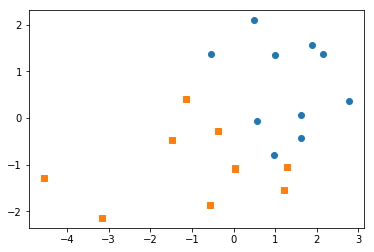

In [4]:
plt.plot(X[y==0,1], X[y==0,2], 'o')
plt.plot(X[y==1,1], X[y==1,2], 's')

We hope to find a nice classifier that separates the blue and green points, i.e., with a diagonal line sloping down.

Training logistic regression requires computing the *cross-entropy* objective, which is defined as $$\log \prod_i P(y_i | \mathbf{x}_i) = \sum_i \log P(y_i | \mathbf{x}_i)$$
with a penalty term on the weight magnitude. We maximise this with respect to the weights **w** using the **BFGS** gradient optimiser. This requires the gradient of the objective, as defined below.

w is [ 0.         -0.78302008 -0.63794949] objective is 6.9427571445
w is [ 0.14295498 -0.63017589 -0.98387111] objective is 6.50092118446
w is [-0.09413723 -0.74164424 -1.20729039] objective is 6.16455747535
w is [ 0.22000008 -1.15230394 -1.30581673] objective is 5.89824250378
w is [ 0.12769572 -1.10940424 -1.36092315] objective is 5.87643711839
w is [ 0.11287822 -1.1082046  -1.37337883] objective is 5.87591881268
w is [ 0.11250886 -1.10954137 -1.37468325] objective is 5.87591242632
w is [ 0.11258998 -1.10984497 -1.37482089] objective is 5.87591226164
w is [ 0.11259694 -1.10985086 -1.37481647] objective is 5.8759122615
Optimization terminated successfully.
         Current function value: 5.875912
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11


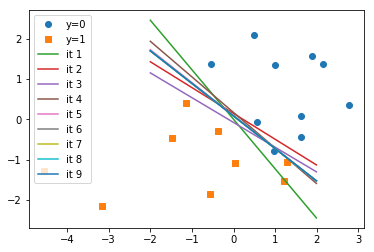

In [5]:
# training objective, the "cross entropy" or log probability of the training data 
def objective(w, X, y, ss):
    # takes parameter vector, w, matrix of training inputs X, training output vector (of 0s and 1s) y, and prior term 
    # predictive probability is the logistic sigmoid of x.w 
    prob_y = 1./(1.+np.exp(-np.dot(X,w)))
    #      regularisation term     +     log probability of class 1    +   log probablity of class 0 
    obj = -(1./(2*ss))*np.dot(w,w) + np.dot(y, np.log(prob_y)) + np.dot(1. - y, np.log(1. - prob_y))
    return -obj

# for binary data y is either 0 or 1, so the dot products with y and 1-y sum up the 
# predictive log probabilities for just the 0 labelled instances, or 1 labelled instances
# (this is a clever trick that allows us to avoid writing a loop; and tends to run much faster)

# the gradient of the above with respect to weights w 
def dobj_dw(w, X, y, ss):
    prob_y = 1./(1.+np.exp(-np.dot(X, w)))
    grad = -(1./ss)*w + np.dot(y - prob_y, X)
    return -grad


# display function called each iteration of BFGS
plt.plot(X[y==0,1], X[y==0,2], 'o')
plt.plot(X[y==1,1], X[y==1,2], 's')

def display(w):
    # add a line to the plot showing the decision boundary, where 
    # the classification is tied, Pr(y=0) = Pr(y=1)
    # (either side of this line correspond to class 0 and 1)
    xdisp = np.arange(-2, 2, 0.01)
    ydisp = -(w[0] + w[1] * xdisp)/w[2]
    plt.plot(xdisp, ydisp)
    print('w is', w, 'objective is', objective(w, X, y, ss))

# minimise using BFGS gradient based solver
# Optimize the function, f, whose gradient is given by fprime using the quasi-Newton method of Broyden, Fletcher, Goldfarb, and Shanno (BFGS)


ss = 1
w = fmin_bfgs(f=objective, fprime=dobj_dw, x0=np.array([0,0,0]), 
              args=(X, y, ss), disp=True, callback=display)

plt.legend(['y=0', 'y=1'] + ['it %d' % i for i in range(1,20)])

Of course in practise you'd use a more optimised method such as logistic regression implementations in Scikit-learn, Theano, R etc. The version above is likely to have problems with floating point underflow and overflow.   

In [6]:
w

array([ 0.11259694, -1.10985086, -1.37481647])

Try running this a few times on fresh random data (rerun the commands at the top), until you get a linearly separable problem. In this case what happens as you change ss, e.g., to 0 (or near to zero, e.g., 1e-10) to remove the effect of the regularisation term.

## The objective space

It's instructive to take a look at the objective function directly, which we can do here as we have so few dimensions. We'll ignore the bias term, and plot the training objective as a function of the two other weights.  

<a list of 11 text.Text objects>

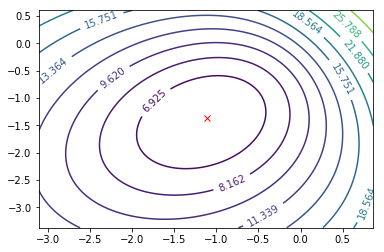

In [7]:
import matplotlib.mlab as mlab

delta = 0.025
w1, w2 = np.meshgrid(np.arange(w[1]-2.0, w[1]+2.0, delta), np.arange(w[2]-2.0, w[2]+2.0, delta))
ws = np.vstack([w[0] * np.ones_like(w1.flatten()), w1.flatten(), w2.flatten()])
obj = np.zeros(ws.shape[1])
for i in range(ws.shape[1]):
    obj[i] = objective(ws[:,i], X, y, ss)
    
plt.figure()
CS = plt.contour(w1, w2, obj.reshape(w1.shape), levels=np.exp(np.linspace(np.log(min(obj.flatten())), np.log(max(obj.flatten())), 12)))
plt.plot(w[1], w[2], 'rx')
plt.clabel(CS, inline=1, fontsize=10)


See how it's nice and smooth. You can imagine how continuing to walk downhill from any point will lead you to the optimum, marked by the cross. This is because the surface is *convex*. But what happens if we turn off or reduce the regularisation term in the objective?

<a list of 9 text.Text objects>

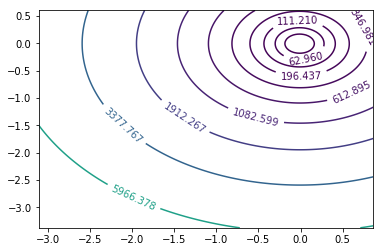

In [8]:
import matplotlib.mlab as mlab

delta = 0.025
w1, w2 = np.meshgrid(np.arange(w[1]-2.0, w[1]+2.0, delta), np.arange(w[2]-2.0, w[2]+2.0, delta))
ws = np.vstack([w[0] * np.ones_like(w1.flatten()), w1.flatten(), w2.flatten()])
obj = np.zeros(ws.shape[1])
for i in range(ws.shape[1]):
    obj[i] = objective(ws[:,i], X, y, 1e-3)

plt.figure()
CS = plt.contour(w1, w2, obj.reshape(w1.shape), levels=np.exp(np.linspace(np.log(min(obj.flatten())), np.log(max(obj.flatten())), 12)))
#plt.plot(w[1], w[2], 'rx')
plt.clabel(CS, inline=1, fontsize=10)
